<a href="https://colab.research.google.com/github/ChandaSourav/Lens-Solver/blob/main/lens_chatgpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [30]:
pip install --upgrade openai easyocr pytesseract pyttsx3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openai
import cv2
import re
from PIL import Image, ImageOps
import pytesseract
import pyttsx3
import os

from pytesseract import Output

import warnings
warnings.filterwarnings("ignore")

In [32]:
#we have to work with this so, uncomment it before using the code

#itr = int(input("Enter the number of searches you want to perform : "))

In [33]:
# Set up the OpenAI API client
f = open("/content/drive/MyDrive/Colab Notebooks/Key/OpenAI_key.txt",'r',encoding="utf8")
key = f.read()
openai.api_key = key

In [34]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [35]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


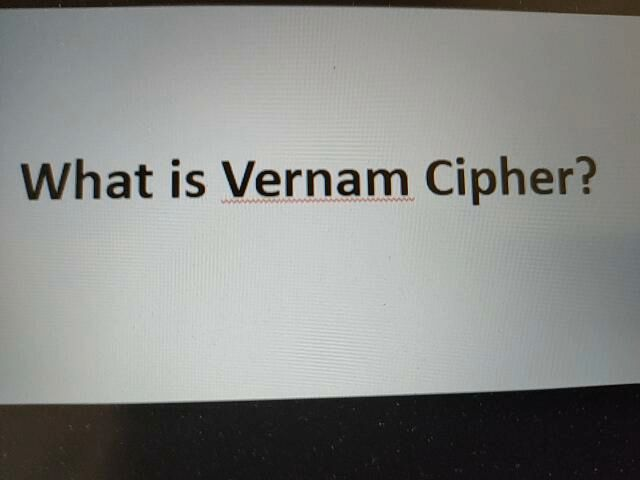

In [36]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

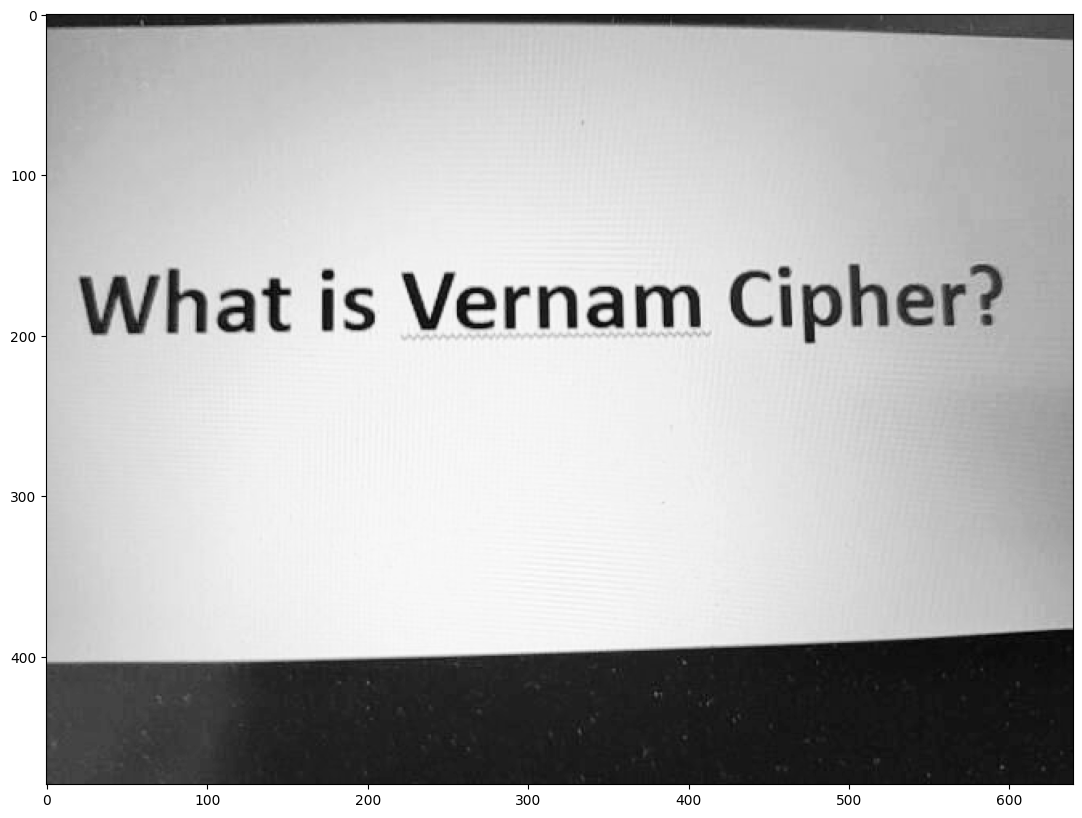

In [37]:
file_name = "/content/photo.jpg"
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
#image = cv2.flip(image, 1)
plot_gray(image)

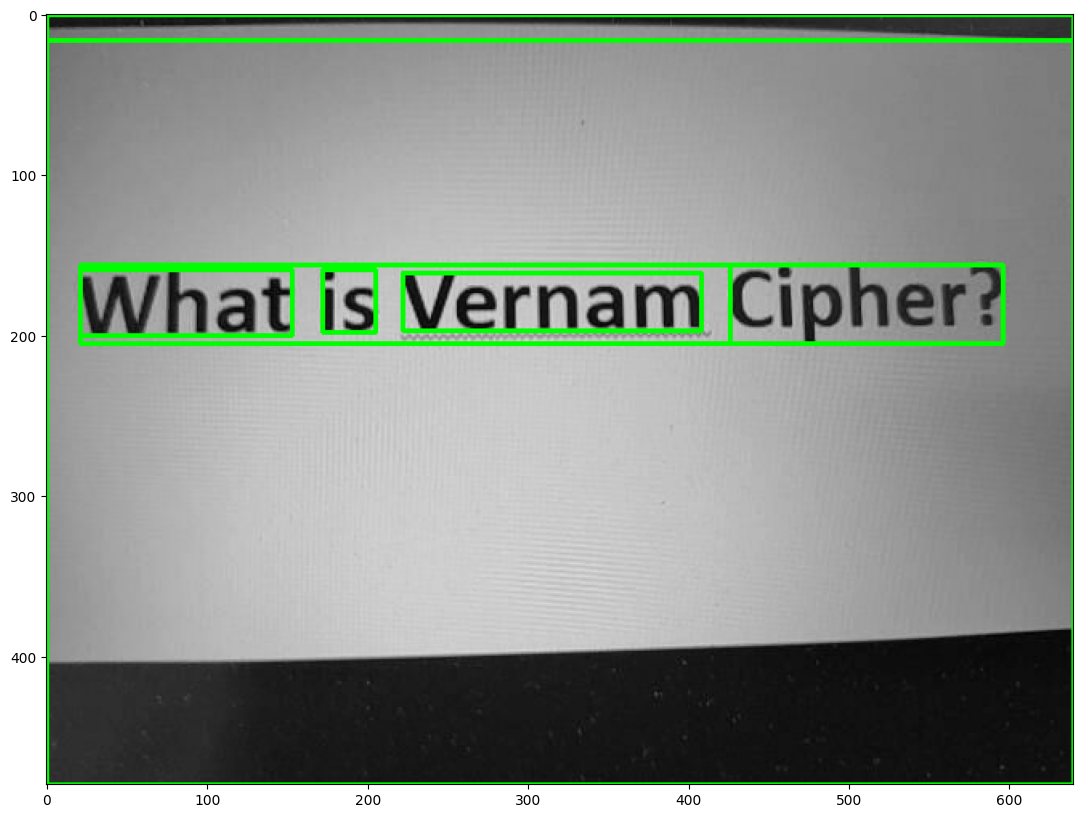

In [38]:
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)

In [39]:
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

 

What is Vernam Cipher?



In [40]:
messages = []

itr = 1
while itr:
    #message = input("You: ")
    message = "what is rail-fence cipher"
    
    if message:
        messages.append({"role": "user", "content": extracted_text},)
        chat_completion = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages=messages)
    answer = chat_completion.choices[0].message.content
    answer = answer.replace("OpenAI", "Subhajeet & Sourav")
    print(f"Stella : {answer}")
    messages.append({"role": "assistant", "content": answer})
    itr -= 1

Stella : The Vernam Cipher, also known as the One-Time Pad, is an encryption technique that uses a sequence of random keys or bits to encrypt plaintext message. It was developed by Gilbert Vernam in 1917 and is considered to be one of the most secure encryption algorithms. The key used in this cipher is at least the same length as the message being encrypted and can only be used once. The plaintext is combined with the key through a process called bitwise XOR (exclusive OR) and the resulting cipher text is transmitted over a secure channel. To decrypt the message, the receiver must have an identical copy of the key and use it to perform another XOR operation on the cipher text. Since the key is random and only used once, the Vernam Cipher is considered to be unbreakable.


In [41]:
'''engine = pyttsx3.init()
engine.say(answer)
engine.runAndWait()'''

'engine = pyttsx3.init()\nengine.say(answer)\nengine.runAndWait()'